In [1]:
import json
import datetime
import pandas as pd
import numpy as np
from collections import OrderedDict

In [2]:
#Data from http://www.ultimaterankings.net/download.html
json_data=open('usau_database.json').read()
data = json.loads(json_data)

In [3]:
data.keys()

[u'tournaments', u'games', u'id', u'teams']

In [4]:
data['teams'][0]

{u'id': u'dHP4OF2933HXVGrIpWK%2f4FCcI6ithl6x98Nwnx3%2b6Ic',
 u'name': u'Alabama-Birmingham (Inferno)',
 u'usau_rating': {u'losses': 8, u'score': 1330.0, u'wins': 10}}

In [5]:
data['tournaments'][0]

{u'id': u'Heart-of-Texas-Huckfest-2016',
 u'name': u'Heart of Texas Huckfest 2016'}

In [6]:
data['games'][10]

{u'id': u'BJqUZviPseUsP%2bmZBMKRTUzuhlBsKCoHQ34pLgViuMg',
 u'local_datetime': u'2016-03-20 10:00',
 u'score': [13, 11],
 u'teams': [u'B6lUQxBw7%2fUGN0505cwf9CONoJwD%2fgEX7yiqLf%2b5yE0',
  u'nBwnp8VsMQk6mqcMw8QPOpDi%2bXJODhZUeLhRQ3VfSvY'],
 u'tournament': u'Trouble-in-Vegas-2016'}

In [7]:
data['id']

u'College-Men'

In [8]:
game_date = datetime.datetime.strptime(data['games'][0]['local_datetime'], "%Y-%m-%d %H:%M")
game_date_2 = datetime.datetime.strptime(data['games'][1]['local_datetime'], "%Y-%m-%d %H:%M")

In [9]:
print data['games'][0]['local_datetime']
print game_date.year
print data['games'][1]['local_datetime']
print game_date_2 - game_date

2016-04-02 16:00
2016
2016-02-06 13:30
-57 days, 21:30:00


In [10]:
base_date =  datetime.datetime(2015, 7, 1)

In [11]:
(game_date-base_date).total_seconds()

23904000.0

In [12]:
games_df = pd.io.json.json_normalize(data['games'])
teams_df = pd.io.json.json_normalize(data['teams'])

In [13]:
games_df

,blacklisted_reason,id,local_datetime,score,teams,tournament
0,NaN,jTC8wbwqM3RClOjIPvrJlbwjDYpVZlN5hfYheyekKR0,2016-04-02 16:00,"[13, 11]",[Qf3jYJ%2fdthCVtDxY%2fXETXLe7%2b00oFeAY%2fGYWo...,New-England-Open-2016
1,NaN,EFZ%2fLCw%2bi4yBAT0zkRJSA4LbMZfXIJYK%2bKQG3Vs1...,2016-02-06 13:30,"[13, 6]",[swLtdMSjQGh%2fBV0mbV6eMikNaWg9UC0wMXlWZNIwDNs...,Queen-City-Tune-Up-2016
2,NaN,cN2mHDVJTfKGKajHnuFjoZftWGTlM4sBLTK44Gb0DNc,2016-01-23 11:40,"[5, 11]","[hHrCfbMsqEEZL4qyqSyFXEikf81f38GEe3ignOTSWbU, ...",Flat-Tail-College-Open-2016
3,blacklisted,677%2bclF1nGF8ZC3UWPzvdmWD%2bZ0mqEPN38MI3%2fNKPW8,2016-01-11 02:30,"[9, 11]",[6Y%2bUchVdGiN9Tz1L1txXBYaJ0OwYdPr9tdUHP%2bnpq...,Santa-Barbara-Qualifier-2016
4,NaN,soyTQV0DnLmGtLCKLDw%2b4D9t6SzZG%2bemjajJMIuy6A0,2016-03-20 13:00,"[11, 9]","[1iChaM51cr53WwEfNxxEto3jOYwiLcIfGppcxJk4tDM, ...",Trouble-in-Vegas-2016
5,NaN,zP6o%2fgvmhgmEEKmPWsELJUH0Qn6R69nVZF%2fF86TtPIU,2016-02-12 09:00,"[13, 6]",[yJzoxQ3JhnArLrP%2fdgtwo%2bH7UBOez0UbhP6%2fZDF...,Warm-up-A-Florida-Affair-2016
6,NaN,bJhfFGzxn7kHTr2JvC7APj7SBCBSYe2XOFIn%2ffZuziA,2016-03-13 09:20,"[13, 1]",[yrUr41RxVCTCoJmHb7PBVCj2u%2fYJKu%2f8%2byUSuFo...,Rip-Tide-2016
7,NaN,8tQErkwEWZzaWKDhJNuF08tndPyrxLmGu6EBmrGdgaM,2016-02-28 13:00,"[14, 12]",[RDMgTRKg1DKg257NCaLyr76wKrqZ0I9U%2bBaH2YR1MYM...,Hundred-Acre-Wood-2016
8,NaN,7DUVA5a61MFjJMVhgHbAl5qu1vxw4CyOs6RR%2fx%2ft6DM,2016-04-02 09:00,"[9, 12]",[mu0s7EnpqiEBHov%2ffKhPCeXtG5hYeimTh3066jqLRjQ...,DIII-Easterns-2016
9,NaN,5nE982RYLWBv9hbqzFThbTn1m8rtYQnffDftz6xPvAE,2016-03-05 15:00,"[5, 13]",[sqBOVdrf%2fb%2bvGFDo4FxvAbjNCaeShpUUY%2fCD89t...,Boise-Big-Sky-Brawl-2016


In [14]:
teams_df

,id,name,usau_rating,usau_rating.losses,usau_rating.score,usau_rating.wins
0,dHP4OF2933HXVGrIpWK%2f4FCcI6ithl6x98Nwnx3%2b6Ic,Alabama-Birmingham (Inferno),NaN,8,1330,10
1,QwWYWgLFpfsquPuzXaPZ1jc1hlf3kw%2bUWQEqdH5FGbc,RIT (RIT Spudheds),NaN,4,1107,14
2,%2bIG3fKP7FAnAoAmq5paF760u9emIIlzIWoGNKGzb1zs,Princeton (Clockwork),NaN,11,846,9
3,rHK4D3huWbOjSr20VH%2f37Tq%2bcDh52EYpYqXPEHyBloQ,Dayton (UD Ultimate),NaN,7,1188,11
4,8mt8pgj3V5NGAth4oc5vQO6LaSJwZEuPH8gLXIXw%2b0I,Brown-B (Brown - B),NaN,NaN,NaN,NaN
5,WEHqcLUO1g5Ye1A0GwLVWVHz7ZkksZ59S0mgYqIUP5s,Trine (Thunder Ultimate),NaN,8,608,2
6,huMtDOZH7CkW1susZo1kZGyjME1laqTMUaaa1K6XS%2f8,UCLA-B (UCLA-B),NaN,NaN,NaN,NaN
7,0GIECeqJ3TzHnm85Ih3m6VFxsKP690yZHcE0vbKNeBg,Utah Valley (UVU Ultimate),NaN,NaN,NaN,NaN
8,JD9YXnjBMv2Q7Vg3QT92UCqbAvKOx3TEMHAlxjxr9ns,Pittsburgh-Johnstown (Flood),NaN,7,-434,0
9,ZQAao2m9pbwO%2fTn0d59E7g6YiIa3oOqmqr%2fjHudQSBU,Northwestern-B (Bolt),NaN,13,262,2


In [15]:
print len(np.argsort(pd.unique(games_df['local_datetime'])))
timesort = pd.unique(games_df['local_datetime'])[np.argsort(pd.unique(games_df['local_datetime']))]

741


In [16]:
ratings_dict[team['id']]

NameError: name 'ratings_dict' is not defined

In [17]:
games_df[games_df['local_datetime'] == timesort[0]]

,blacklisted_reason,id,local_datetime,score,teams,tournament
296,NaN,xp2ZKiIlUi%2fuaSlFNoFjFi9m8z9MSjxOWhZP8P2est4,2016-01-09 15:00,"[13, 1]","[ok5FYl0JDObSsH3Ech9Pst5JZxfKpF8XwZYR8tPnndg, ...",Santa-Barbara-Qualifier-2016


In [18]:
games_df[games_df['tournament'] == 'Santa-Barbara-Qualifier-2016']

,blacklisted_reason,id,local_datetime,score,teams,tournament
3,blacklisted,677%2bclF1nGF8ZC3UWPzvdmWD%2bZ0mqEPN38MI3%2fNKPW8,2016-01-11 02:30,"[9, 11]",[6Y%2bUchVdGiN9Tz1L1txXBYaJ0OwYdPr9tdUHP%2bnpq...,Santa-Barbara-Qualifier-2016
21,NaN,%2bIDPsAc7dD5etKau%2f26aGrrO%2bNHA4kkValo939yD...,2016-01-09 22:30,"[13, 5]","[UAoHLMZQozqsp3yOfxYhWavAAbNGttuOzTlVcKWzDmQ, ...",Santa-Barbara-Qualifier-2016
159,NaN,L7i1sI%2bvkoCKZ9vyXXaAyc9yWNZ%2fGm8fglsR4%2fcEVUw,2016-01-09 21:00,"[13, 6]","[UuJIRFUvXczuolRSurB5uLtGcafpYWmNgHoO36teGH0, ...",Santa-Barbara-Qualifier-2016
284,blacklisted,LgdiA5sVMK3qplD4zsGCeAQqvAQtcVTp8RCbZG0eytc,2016-01-11 05:30,"[7, 10]",[26lidC5%2be%2fitUVgcIdFpxPX0oEZ9RXzsxkixRROzs...,Santa-Barbara-Qualifier-2016
296,NaN,xp2ZKiIlUi%2fuaSlFNoFjFi9m8z9MSjxOWhZP8P2est4,2016-01-09 15:00,"[13, 1]","[ok5FYl0JDObSsH3Ech9Pst5JZxfKpF8XwZYR8tPnndg, ...",Santa-Barbara-Qualifier-2016
406,blacklisted,x8t8TTo24yII8PaIiBLCZ3ioXbzOEckYyoI58xhmNlo,2016-01-11 05:30,"[5, 13]",[gujvB40BucPfW%2b9Qt%2braB6fbHy2hNHEMQesJpzPk%...,Santa-Barbara-Qualifier-2016
419,NaN,6jxaalyBG4knfor%2fJR%2biKDKLxeVGSZsLweP4Cs9dRmk,2016-01-10 01:30,"[10, 11]",[6AsSMwCD7XkrPtKOmProVG5mZ1EDc%2bpIe2ySN3w0pMI...,Santa-Barbara-Qualifier-2016
698,blacklisted,sY%2fAEnbI6yea0RuiDHM%2fXlmpdV1KsgDnwezFZWhFDkM,2016-01-10 08:30,"[13, 2]","[p67ChgiP7COwn2ARb94UAmBmMiMCrVeGk4MfkGIosJc, ...",Santa-Barbara-Qualifier-2016
816,blacklisted,H6BDUW9DXW9%2fyXkk0KcVJBablWR9UDYa%2fTAcyIez2fM,2016-01-10 02:30,"[13, 4]","[UAoHLMZQozqsp3yOfxYhWavAAbNGttuOzTlVcKWzDmQ, ...",Santa-Barbara-Qualifier-2016
839,NaN,9Y56Hgc66IIaLlnNkVR%2fiDJnWguJLK6vn%2b2Xw8dcSq4,2016-01-10 00:00,"[13, 7]",[6AsSMwCD7XkrPtKOmProVG5mZ1EDc%2bpIe2ySN3w0pMI...,Santa-Barbara-Qualifier-2016


In [68]:
def win_loss_rating_change(rating_1, rating_2, score):
    K = 80
    transformed_1 = np.power(10, rating_1/400.)
    transformed_2 = np.power(10, rating_2/400.)
    expected_1 = transformed_1/(transformed_1+transformed_2)
    expected_2 = transformed_2/(transformed_1+transformed_2)
    if score[0] > score[1]:
        actual_1 = 1
        actual_2 = 0
    elif score[0] < score[1]:
        actual_1 = 0
        actual_2 = 1
    else:
        raise ValueError('No winner')
    new_rating_1 = rating_1 + K*(actual_1 - expected_1)
    new_rating_2 = rating_2 + K*(actual_2 - expected_2)
    return new_rating_1, new_rating_2

In [118]:
def win_loss_rating_change(rating_1, rating_2, score):
    #Based upon https://metinmediamath.wordpress.com/2013/11/27/how-to-calculate-the-elo-rating-including-example/
    K = 40
    transformed_1 = np.power(10, rating_1/400.)
    transformed_2 = np.power(10, rating_2/400.)
    expected_1 = transformed_1/(transformed_1+transformed_2)
    expected_2 = transformed_2/(transformed_1+transformed_2)
    if score[0] > score[1]:
        actual_1 = 1
        actual_2 = 0
        elo_winner = rating_1
        elo_loser = rating_2
    elif score[0] < score[1]:
        actual_1 = 0
        actual_2 = 1
        elo_winner = rating_2
        elo_loser = rating_1
    else:
        raise ValueError('No winner')
        
    #From http://fivethirtyeight.com/datalab/introducing-nfl-elo-ratings/
    mov_multiplier = np.log(np.abs(score[0]-score[1])+1) * (2.2/((elo_winner - elo_loser)*.001+2.2))
        
    new_rating_1 = rating_1 + mov_multiplier*K*(actual_1 - expected_1)
    new_rating_2 = rating_2 + mov_multiplier*K*(actual_2 - expected_2)
    return new_rating_1, new_rating_2

In [93]:
def win_loss_rating_change_points(rating_1, rating_2, score):
    new_rating_1 = rating_1
    new_rating_2 = rating_2
    team_1_scores = np.ones(score[0])
    team_2_scores = np.zeros(score[1])
    game_scores = np.append(team_2_scores, team_1_scores)
    for point in game_scores:
        K = 80
        transformed_1 = np.power(10, new_rating_1/400.)
        transformed_2 = np.power(10, new_rating_2/400.)
        expected_1 = transformed_1/(transformed_1+transformed_2)
        expected_2 = transformed_2/(transformed_1+transformed_2)
        if point == 1.:
            actual_1 = 1
            actual_2 = 0
        elif point == 0.:
            actual_1 = 0
            actual_2 = 1
        else:
            raise ValueError('No winner')
        new_rating_1 = new_rating_1 + K*(actual_1 - expected_1)
        new_rating_2 = new_rating_2 + K*(actual_2 - expected_2)
    return new_rating_1, new_rating_2

In [21]:
def win_probability(rating_1, rating_2):
    transformed_1 = np.power(10, rating_1/400.)
    transformed_2 = np.power(10, rating_2/400.)
    expected_1 = transformed_1/(transformed_1+transformed_2)
    expected_2 = transformed_2/(transformed_1+transformed_2)
    return expected_1, expected_2

In [22]:
x = win_loss_rating_change(1400, 1600, games_dict[timesort[7]]['scores'][0])

NameError: name 'games_dict' is not defined

In [119]:
teams_dict = {}
ratings_dict = {}
for team in data['teams']:
    teams_dict[team['id']] = team['name']
    prelim_dict = OrderedDict([(u'2016-01-01 12:00', 1500.)])
    for time_stamp in timesort:
        prelim_dict[time_stamp] = 1500.
    ratings_dict[team['id']] = prelim_dict

In [120]:
games_dict = {}
for time_stamp in timesort:
    time_games = games_df[games_df['local_datetime'] == time_stamp]
    time_games = time_games[time_games['blacklisted_reason'] != 'blacklisted']
    #time_games = time_games[time_games['blacklisted_reason'] != 'ignored']
    date_list = []
    internal_dict = {}
    internal_dict['teams'] = np.asarray(time_games['teams'])
    internal_dict['scores'] = np.asarray(time_games['score'])
    games_dict[time_stamp] = internal_dict        

In [121]:
prev_time_stamp = u'2016-01-01 12:00'
i = 0
length = len(timesort)+1
for time_stamp in timesort:
    print time_stamp
    for score, teams in zip(games_dict[time_stamp]['scores'], games_dict[time_stamp]['teams']):
        old_rating_1 = ratings_dict[teams[0]][prev_time_stamp]
        old_rating_2 = ratings_dict[teams[1]][prev_time_stamp]
        new_rating_1, new_rating_2 = win_loss_rating_change(old_rating_1, old_rating_2, score)
        #new_rating_1, new_rating_2 = win_loss_rating_change_points(old_rating_1, old_rating_2, score) 
        for time_idx in timesort[i:]:
            ratings_dict[teams[0]][time_idx] = new_rating_1
            ratings_dict[teams[1]][time_idx] = new_rating_2
    prev_time_stamp = time_stamp
    i+=1

2016-01-09 15:00
2016-01-09 19:30
2016-01-09 21:00
2016-01-09 22:30
2016-01-09 23:30
2016-01-10 00:00
2016-01-10 01:00
2016-01-10 01:30
2016-01-10 02:30
2016-01-10 04:00
2016-01-10 05:30
2016-01-10 07:00
2016-01-10 08:30
2016-01-10 11:00
2016-01-10 15:00
2016-01-10 19:30
2016-01-10 21:00
2016-01-10 23:30
2016-01-11 01:00
2016-01-11 02:30
2016-01-11 04:00
2016-01-11 05:30
2016-01-11 06:30
2016-01-23 09:00
2016-01-23 10:20
2016-01-23 11:40
2016-01-23 13:00
2016-01-23 14:20
2016-01-23 15:40
2016-01-23 16:00
2016-01-23 17:00
2016-01-23 18:20
2016-01-23 18:40
2016-01-23 20:00
2016-01-23 22:40
2016-01-24 00:00
2016-01-24 09:00
2016-01-24 10:30
2016-01-24 12:00
2016-01-24 13:30
2016-01-24 15:00
2016-01-24 16:00
2016-01-24 19:00
2016-01-29 19:00
2016-01-29 20:30
2016-01-30 08:00
2016-01-30 09:00
2016-01-30 09:30
2016-01-30 09:40
2016-01-30 09:45
2016-01-30 10:45
2016-01-30 10:50
2016-01-30 11:00
2016-01-30 11:20
2016-01-30 11:30
2016-01-30 12:30
2016-01-30 12:40
2016-01-30 13:00
2016-01-30 13:

In [122]:
final_ratings = []
for team in teams_dict.keys():
    final_ratings.append(ratings_dict[team].values()[-1])
final_rankings = np.argsort(final_ratings)[::-1]
for team_id in final_rankings[:40]:
    print teams_dict.values()[team_id]

In [48]:
final_ratings[120]

1146.2485365668233

In [30]:
np.min(final_ratings)

1175.7704945260562

In [31]:
np.array(win_probability(1957.97, 1249.16)), np.array(win_probability(1957.97, 1249.16))*15.

(array([ 0.98337754,  0.01662246]), array([ 14.75066311,   0.24933689]))

In [32]:
teams_dict.values()

[u'Alabama-Birmingham (Inferno)',
 u'RIT (RIT Spudheds)',
 u'Princeton (Clockwork)',
 u'Dayton (UD Ultimate)',
 u'Brown-B (Brown - B)',
 u'Trine (Thunder Ultimate)',
 u'UCLA-B (UCLA-B)',
 u'Utah Valley (UVU Ultimate)',
 u'LSU (LSU Ultimate)',
 u'Northwestern-B (Bolt)',
 u'Iowa (IHUC)',
 u'Kansas-B (Vertikillz)',
 u'Auburn-B (Auburn)',
 u'Hamilton (Hot Saucers)',
 u'Caltech (Aftermath)',
 u'Missouri (Missouri)',
 u'Amherst (Army of Darkness)',
 u'Texas State -B (Texas State B)',
 u'Gnomes and Friends',
 u'UCLA (Smaug)',
 u'SUNY-Albany (SCAM)',
 u"Stonehill (Stonehill College Men's Ultimate)",
 u'Purdue (Undue Ultimate)',
 u'Wooster (RamJam)',
 u'Hofstra (Flying Dutchmen)',
 u'Washington-B (Washington B)',
 u'North Carolina-Asheville (UNC Asheville Bulldogs)',
 u'Alabama (Yellow Hammer)',
 u'Gonzaga (GURU)',
 u'Villanova (Villanova)',
 u'Indiana-B (HoosierDaddy!s)',
 u'Navy (Poseidon)',
 u'Kansas (Horrorzontals)',
 u'Coe (Kohucks)',
 u'Minnesota-B (Ugly Duckling)',
 u'Texas A&M (Commerce

In [49]:
teams_dict.values()[448], final_ratings[448]

(u'Washington-C (Washington C)', 1234.9123798620953)

In [51]:
zip(ratings_dict.values()[120].keys(), ratings_dict.values()[120].values())

[(u'2016-01-01 12:00', 1500.0),
 (u'2016-01-09 15:00', 1500.0),
 (u'2016-01-09 19:30', 1500.0),
 (u'2016-01-09 21:00', 1500.0),
 (u'2016-01-09 22:30', 1500.0),
 (u'2016-01-09 23:30', 1500.0),
 (u'2016-01-10 00:00', 1500.0),
 (u'2016-01-10 01:00', 1500.0),
 (u'2016-01-10 01:30', 1500.0),
 (u'2016-01-10 02:30', 1500.0),
 (u'2016-01-10 04:00', 1500.0),
 (u'2016-01-10 05:30', 1500.0),
 (u'2016-01-10 07:00', 1500.0),
 (u'2016-01-10 08:30', 1500.0),
 (u'2016-01-10 11:00', 1500.0),
 (u'2016-01-10 15:00', 1500.0),
 (u'2016-01-10 19:30', 1500.0),
 (u'2016-01-10 21:00', 1500.0),
 (u'2016-01-10 23:30', 1500.0),
 (u'2016-01-11 01:00', 1500.0),
 (u'2016-01-11 02:30', 1500.0),
 (u'2016-01-11 04:00', 1500.0),
 (u'2016-01-11 05:30', 1500.0),
 (u'2016-01-11 06:30', 1500.0),
 (u'2016-01-23 09:00', 1500.0),
 (u'2016-01-23 10:20', 1506.6876872592604),
 (u'2016-01-23 11:40', 1471.8362379043558),
 (u'2016-01-23 13:00', 1471.8362379043558),
 (u'2016-01-23 14:20', 1616.9278506528549),
 (u'2016-01-23 15:40', 1

In [35]:
games_dict[u'2016-01-23 13:00']

{'scores': array([[5, 10], [4, 11], [11, 8], [11, 7], [11, 1]], dtype=object),
 'teams': array([ [u'hHrCfbMsqEEZL4qyqSyFXEikf81f38GEe3ignOTSWbU', u's5NAN6czAOPwFBhYBglJTPuu4eGqiV1DAxTqnX9rGkQ'],
        [u'VmKsMR2xHvE2jQrjnmUGqVnHX9xCvUf66y5JTo45EcA', u'HQLEtKdSrlpqwVTcYaw9PT8EzPHZIj7tCXLcVxhqhFE'],
        [u'MMi0c%2fjwPZR7Bh6BC5DB5nPlsj6SA40sjPNOoj%2fXF0s', u'Hwya%2fzxnBeaIZHkUr0DltbZRD7lfN9pNAyJuJgKpUNU'],
        [u'TevUMS99G4CENYjkWqX5KWKfqw9dHA%2byXUoEZjFV6zg', u'Nn8cfGjLdZ9xlk%2fv05mdzZQ21QG9chJtShNxf%2ftTWvE'],
        [u'gBG3B59%2b55zsuZ6XCXF5HMDx3bCTVG0dH%2fJLLKEB0b0', u'9VXJf4WdL1YyNE0G7Zm%2bJ5Lb3vbwczazxCHIvUONcVU']], dtype=object)}

In [36]:
games_df[games_df['local_datetime'] == u'2016-01-23 13:00']

,blacklisted_reason,id,local_datetime,score,teams,tournament
863,NaN,GuYGqwFkfM6ZJpTC2fyiT8irXK7DP0V3hrSq5sRPAWs,2016-01-23 13:00,"[5, 10]","[hHrCfbMsqEEZL4qyqSyFXEikf81f38GEe3ignOTSWbU, ...",Flat-Tail-College-Open-2016
992,NaN,etEsot8JSX8YCFFj2hd0NtVMzyvoOzx3tkZTxIwUS6Q,2016-01-23 13:00,"[4, 11]","[VmKsMR2xHvE2jQrjnmUGqVnHX9xCvUf66y5JTo45EcA, ...",Flat-Tail-College-Open-2016
1818,NaN,GjtTt1q6XvkpiZwuAD38lTtwVaE257K6yFu19AWVRck,2016-01-23 13:00,"[11, 8]",[MMi0c%2fjwPZR7Bh6BC5DB5nPlsj6SA40sjPNOoj%2fXF...,Flat-Tail-College-Open-2016
1936,NaN,b1hcEftLuzEXDCJaJep8FEtkkbAjebCq3Ox5yuUiWHc,2016-01-23 13:00,"[11, 7]",[TevUMS99G4CENYjkWqX5KWKfqw9dHA%2byXUoEZjFV6zg...,Flat-Tail-College-Open-2016
3433,NaN,9lx%2bQeA%2bRoQf9OqgXgumwoWv8YRtwQ53MxkafW47w%2f8,2016-01-23 13:00,"[11, 1]",[gBG3B59%2b55zsuZ6XCXF5HMDx3bCTVG0dH%2fJLLKEB0...,Flat-Tail-College-Open-2016


In [37]:
games_df[games_df['local_datetime'] == u'2016-01-23 13:00']['teams'][863]

[u'hHrCfbMsqEEZL4qyqSyFXEikf81f38GEe3ignOTSWbU',
 u's5NAN6czAOPwFBhYBglJTPuu4eGqiV1DAxTqnX9rGkQ']

In [38]:
teams_dict['s5NAN6czAOPwFBhYBglJTPuu4eGqiV1DAxTqnX9rGkQ']

u'Washington-C (Washington C)'

In [39]:
(np.max([2400., 2000.]))

2400.0

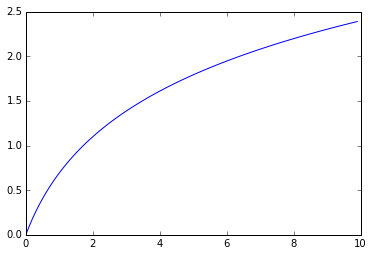

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(0, 10, 0.1), np.log(np.arange(0, 10, 0.1)+1))

In [146]:
final_2015_rankings = []
with open('final_2015_rankings.txt', 'r') as fp:
    for line in fp:
        line_split = line.split('>')
        #if line_split[0].beginswith('<a id="CT_Main_0"'):
        #    print line_split[1]
        if line_split[0].startswith('<a'):
            final_2015_rankings.append(line_split[1][:-3])
final_2015_rankings = final_2015_rankings[:-1]

In [147]:
print final_2015_rankings

['Pittsburgh', 'North Carolina', 'Florida State', 'Central Florida', 'Massachusetts', 'Oregon', 'North Carolina-Wilmington', 'Colorado', 'Texas A&M', 'Carleton College', 'Minnesota', 'Wisconsin', 'Florida', 'Arizona State', 'Georgia', 'Cincinnati', 'Washington', 'Maryland', 'Texas', 'Tulane', 'Tufts', 'California-Santa Barbara', 'Michigan', 'Western Washington', 'Stanford', 'Illinois', 'Auburn', 'Virginia', 'Harvard', 'Franciscan', 'Chico State', 'British Columbia', 'Brandeis', 'North Carolina State', 'Luther', 'California-San Diego', 'Ohio State', 'Northwestern', 'Missouri', 'Notre Dame', 'Iowa', 'Bryant', 'Georgia Tech', 'Penn State', 'Victoria', 'Virginia Commonwealth', 'Colorado College', 'Delaware', 'Maryland B', 'Appalachian State', 'Brown', 'Iowa State', 'Carleton College-GOP', 'Amherst', 'Wisconsin-Milwaukee', 'South Carolina', 'Colorado State', 'Kennesaw State', 'Ohio', 'Washington University', 'Georgia College', 'Tennessee', 'Lehigh', 'Cal Poly-SLO', 'Minnesota-Duluth', 'Virg

In [150]:
print [teams_dict.values()[x] for x in final_rankings]

[u'Oregon (Ego)', u'Massachusetts (Zoodisc)', u'Minnesota (Grey Duck)', u'Wisconsin (Hodags)', u'Baylor (Stonewall A)', u'Valparaiso (Deus Vult)', u'Case Western Reserve (Fighting Gobies[A])', u'Brigham Young (CHI)', u'New Hampshire (New Hampshire)', u'Christopher Newport (Skymaul)', u'Pittsburgh (En Sabah Nur)', u'Richmond (Spidermonkeys)', u'Washington (Sundodgers)', u'British Columbia (Thunderbirds)', u'Franciscan (Fatal)', u'Virginia Commonwealth (Villains)', u'Maryland (Maryland Ultimate)', u'Georgia-B (Chillydawgs)', u'Arkansas (Ludicrous Speed)', u'Wisconsin-B (Pimpdags)', u'California-San Diego (Air Squids)', u'Georgetown (Catholic Justice)', u'Luther (Lufda)', u'North Carolina-Wilmington (Seamen)', u'Houston (Skyline)', u'Georgia Tech (Tribe)', u'Pittsburgh-B (En Sabah Nur-B)', u'Cornell (Buds)', u'Utah (Zion Curtain)', u'Lewis & Clark (Bacchus )', u'William & Mary (Darkhorse)', u'NYU (New York Ultimate)', u'North Carolina (Darkside)', u'Georgia (Jojah)', u'North Carolina Stat

In [224]:
team_wins_dict = {}
ratings_dict = {}
wins_dict = {}
#expected_wins_dict = {}
#actual_wins_dict = {}
rating_corrections_dict = {}
for team in data['teams']:
    teams_dict[team['id']] = team['name']
    #prelim_dict = OrderedDict([(u'2016-01-01 12:00', 1500.)])
    #for time_stamp in timesort:
    #    prelim_dict[time_stamp] = 1500.
    ratings_dict[team['id']] = 1.0
    wins_dict[team['id']] = np.zeros(2) #[actual, expected]
    #actual_wins_dict[team['id']] = 0.0
    rating_corrections_dict[team['id']] = 0.0

In [181]:
games_dict = {}
for time_stamp in timesort:
    time_games = games_df[games_df['local_datetime'] == time_stamp]
    time_games = time_games[time_games['blacklisted_reason'] != 'blacklisted']
    #time_games = time_games[time_games['blacklisted_reason'] != 'ignored']
    date_list = []
    internal_dict = {}
    internal_dict['teams'] = np.asarray(time_games['teams'])
    internal_dict['scores'] = np.asarray(time_games['score'])
    games_dict[time_stamp] = internal_dict 

In [225]:
approx_corr_max = 0.2
while approx_corr_max > 1e-7:
    approx_corr_max = 0.0
    zero_game_teams = []
    #Reset values
    for team_id in teams_dict.keys():
        wins_dict[team_id] = np.zeros(2)
        rating_corrections_dict[team_id] = 0.0
    prev_time_stamp = u'2016-01-01 12:00'
    i = 0
    length = len(timesort)+1
    for time_stamp in timesort:
        for score, teams in zip(games_dict[time_stamp]['scores'], games_dict[time_stamp]['teams']):
            old_rating_1 = ratings_dict[teams[0]]
            old_rating_2 = ratings_dict[teams[1]]
            exp_wins_1, exp_wins_2 = expected_BT_win(old_rating_1, old_rating_2, score)
            fo_corr_1, fo_corr_2 = first_order_BT(old_rating_1, old_rating_2, score)
            wins_dict[teams[0]] += [score[0], exp_wins_1]
            wins_dict[teams[1]] += [score[1], exp_wins_2]
            rating_corrections_dict[teams[0]] += fo_corr_1
            rating_corrections_dict[teams[1]] += fo_corr_2
            #new_rating_1, new_rating_2 = win_loss_rating_change(old_rating_1, old_rating_2, score)
            #new_rating_1, new_rating_2 = win_loss_rating_change_points(old_rating_1, old_rating_2, score) 
            #for time_idx in timesort[i:]:
            #    ratings_dict[teams[0]][time_idx] = new_rating_1
            #    ratings_dict[teams[1]][time_idx] = new_rating_2
        prev_time_stamp = time_stamp
        i+=1
    team_idx = 0
    for team_id in teams_dict.keys():
        if rating_corrections_dict[team_id] != 0.:
            approx_corr = (wins_dict[team_id][0] - wins_dict[team_id][1])*(1/(rating_corrections_dict[team_id]))
            if np.abs(approx_corr) > approx_corr_max:
                approx_corr_max = np.abs(approx_corr)
            if (ratings_dict[team_id] + approx_corr) < 0.001:
                ratings_dict[team_id] = 0.001
            else:
                ratings_dict[team_id] += approx_corr
        else:
            zero_game_teams.append(team_idx)
        team_idx+=1
    print approx_corr_max
print approx_corr_max, zero_game_teams

1.64912280702
1.62937224418
0.905751516695
1.50930415236
0.786691854515
2.14450979265
0.440643452563
1.23429512908
0.114543669106
0.100837973149
0.0884800670008
0.0774311322289
0.0675157397306
0.0587430190874
0.0511231514659
0.0446195516545
0.0389538517189
0.034017511317
0.029732934586
0.0260191847119
0.0228022712983
0.0200148384159
0.0175972580288
0.0154977635862
0.0136715694113
0.0120804188572
0.010691562463
0.00947712563677
0.0084133082779
0.00747981963986
0.00665930774084
0.00593692440349
0.00529992877286
0.00473737150234
0.00423981981268
0.00379913273789
0.00340826908458
0.00306112786878
0.00275241272815
0.00247751800699
0.00223243190439
0.0020136544351
0.00181812746536
0.00164317506967
0.00149332515178
0.00136393714575
0.00124638456231
0.00113950824844
0.00104227207137
0.000953748658266
0.000873106948544
0.000799601305743
0.000732561974683
0.000671386702055
0.000615533365302
0.000564513477517
0.000517886454798
0.000475254548696
0.000436258359999
0.000400572861227
0.00036790386556

In [153]:
def expected_BT_win(rating_1, rating_2, score):
    team_1_expected = np.sum(score)*(rating_1/(rating_1+rating_2))
    team_2_expected = np.sum(score)*(rating_2/(rating_1+rating_2))
    return team_1_expected, team_2_expected

In [156]:
def first_order_BT(rating_1, rating_2, score):
    team_1_correction = np.sum(score)*(rating_2/np.square(rating_1+rating_2))
    team_2_correction = np.sum(score)*(rating_1/np.square(rating_1+rating_2))
    return team_1_correction, team_2_correction

In [188]:
print teams_dict.keys()[7]
print ratings_dict[teams_dict.keys()[7]]

0GIECeqJ3TzHnm85Ih3m6VFxsKP690yZHcE0vbKNeBg
1.0


In [206]:
ratings_dict

{u'%2bAbhvgjbdjrSGPKAgpJTMXqKwOqjWuFGrjimCZT9cC0': 0.1108781098478166,
 u'%2bG94uz4ZIZD%2f1IOs%2fZflJn7Y%2bZeLv0zPG%2fIQxfDZ5F8': 0.0099343105410403306,
 u'%2bIG3fKP7FAnAoAmq5paF760u9emIIlzIWoGNKGzb1zs': 0.12310108242512571,
 u'%2bIb6VPhQsUobiiWvqGREZQoDzS3HdCqdN9hSCNNeXdE': 1.0,
 u'%2bIsTiWP%2fh%2faxEUWjpjg7T1%2fNcjeBFBRKGKmh0vTghm0': 0.020869484581458608,
 u'%2bO1YGcloTymBjwluH1UcxNYzG6CeCsnP55mfBWr%2ff%2f8': 0.29272219818451667,
 u'%2bpFQSJgs1wVFqY3Vr%2b9k%2fLMSve%2bj%2frZCjxnZ4flP9OI': 0.19202035186631627,
 u'%2btjQDkdJ6lIL8abMgWsitgah9Bae%2bv34P7P4DwnYQQM': 0.03380315868030688,
 u'%2f3sWIpJfHDQXFSJDwtC0V%2fkRc1CtjHNRRbk0eVy2bog': 0.14936808448157932,
 u'%2f6mN5tvvD2zHR2IqEdRu6NkjA3JMrKDOtv%2fMHxXjpCs': 0.023750669488500763,
 u'%2fNCEiYJ%2bjLfMHjQHM%2bRyARIKkotj%2bDyq3ITe%2fDLeqNE': 0.12513795088873111,
 u'%2fYqijcOiakZpEYa%2fZ%2ftXlyySS8X2L%2b0ZbBQD2gXbwBA': 0.16260120244807866,
 u'%2fcc6PEqllzs4NjN4WL2osAlxbaU1wJoSgUlhHDiaHJo': 0.040695499242838509,
 u'%2fjDqznJMfda9QhhpETwK%2brU

In [226]:
final_ratings = []
for team in teams_dict.keys():
    final_ratings.append(ratings_dict[team])
final_rankings = np.argsort(final_ratings)[::-1]
for team_id in final_rankings[:40]:
    print teams_dict.values()[team_id]

Massachusetts (Zoodisc)
Minnesota (Grey Duck)
Wisconsin (Hodags)
Pittsburgh (En Sabah Nur)
North Carolina (Darkside)
Stanford (Stanford Bloodthirsty)
Oregon (Ego)
Florida (Florida)
North Carolina-Wilmington (Seamen)
British Columbia (Thunderbirds)
Harvard (Red Line)
Carleton College (Carleton College (CUT))
Washington (Sundodgers)
Colorado (Mamabird)
Georgia (Jojah)
Brigham Young (CHI)
Texas A&M (Dozen)
Arkansas (Ludicrous Speed)
Ohio State (Leadbelly)
Cal Poly-SLO (SLOCORE)
Texas (TUFF)
Michigan (MagnUM)
California-Santa Barbara (Black Tide)
Auburn (Aetos)
Florida State (DUF)
Penn State (Spank)
Virginia Tech (Burn)
Central Florida (Dogs of War)
Victoria (Vikes)
California-San Diego (Air Squids)
Colorado State (Hibida)
James Madison (Hellfish)
Western Washington (Dirt)
LSU (LSU Ultimate)
Missouri (Missouri)
Tulane (Rex)
Purdue (Undue Ultimate)
Maryland (Maryland Ultimate)
Brown (Brownian Motion)
Case Western Reserve (Fighting Gobies[A])


In [228]:
np.sort(ratings_dict.values())

array([  1.00000000e-03,   1.33103931e-03,   2.09949991e-03,
         4.64777061e-03,   5.72012199e-03,   3.23348064e-02,
         3.68302259e-02,   4.06661704e-02,   4.55449654e-02,
         4.75342794e-02,   4.92823877e-02,   5.01570510e-02,
         5.41073875e-02,   6.50906480e-02,   7.09057752e-02,
         7.56339513e-02,   7.71754382e-02,   7.90746544e-02,
         7.92002772e-02,   9.32141529e-02,   9.54359162e-02,
         9.84855278e-02,   1.03007370e-01,   1.07030466e-01,
         1.08425274e-01,   1.11378560e-01,   1.18146347e-01,
         1.22248676e-01,   1.24791781e-01,   1.24805141e-01,
         1.28170830e-01,   1.32498374e-01,   1.33221482e-01,
         1.48908203e-01,   1.52151831e-01,   1.52811348e-01,
         1.62689988e-01,   1.62769100e-01,   1.63297049e-01,
         1.63630254e-01,   1.68943636e-01,   1.69218725e-01,
         1.74212138e-01,   1.76475334e-01,   1.82414451e-01,
         1.83143911e-01,   1.84478107e-01,   1.87484241e-01,
         1.91570672e-01,